<a href="https://colab.research.google.com/github/cfiorio/MomaPython/blob/main/M%C3%A9thodes_de_d%C3%A9veloppement_digital_Python_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p>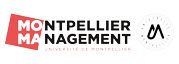</img>
<font size="6px" color=#EB5253>
Méthodes de développement digital - Python</font></p>

# <font color=#A25004>IV. Première analyse de données</font>

Un des intérêts d'utiliser python est de pouvoir analyser efficacement un grand nombre de données, ce qui n'est pas toujours possible en excel.

Python permet aussi d'utiliser les mêmes traitements sur différents jeux de données sans avoir à recréer un nouveau programme comme avec Excel où il faut refaire une feuille excel.

Enfin, l'intérêt majeur de Python est dans la possibilité de réutiliser de nombreuses fonctions écrites par d'autres sans avoir à écrire les programmes nous-même.

## <font color=#FD8008>1. L'utilisation de librairies</font>

> <font color=#66CCFF>**Définition :**</font> *Une* <font color=#FC6666>librairie</font> *ou* <font color=#FC6666>bibliothèque</font> *est un enmsemble d'instructions et de fonctions écrit par d'autres que l'on peut utiliser dans notre propre programme.*

Il existe un très grand nombre de librairies et en cherchant sur internet, vous en trouverez certainement plusieurs adaptées à vos besoins.

Nous en verrons ici principalement 4 :
* math
* Numpy
* Panda
* Seaborn

Pour utiliser une librairie, il faut dire à Python que l'on souhaite l'utiser et d'ajouter (<font color=#9BC645>*importer*</font> en langage informatique) les instructions (appelées <font color=#9BC645>*fonctions*</font>) de la librairie aux instructions disponibles.

#### <font color=#66CCFF>**Syntaxe :** </font>
```
import nom_lib
```

Ensuite pour utiliser une instruction de cette librairie, il faudra indiquer à Python que c'est une fonction de cette libraire en la préfixer du nom de la librairie. Ainsi pour une instruction ```action()``` de la librairie ```nom_lib```, la syntaxe est :
```
nom_lib.action()
``` 

Si le nom de la librairie est long, on peut définir un raccourci grâce au mot clef ```as``` afin que le prefixe des instructions soit plus simple. La syntaxe est alors :
```
import nom_lib_tres_long as court
court.action()
``` 


#### <font color=#66CCFF>**Exemple : la librairie math** </font>


Certaines fonctions mathématiques, pourtant assez courantes, ne sont pas disponibles de base avec Python mais elles sont définis dans la librairie ```math```. 

Ainsi si l'on veut par exemple calculer un <font color=#9BC645>*sinus*</font> ou un <font color=#9BC645>*cosinus*</font>, il faut faire : 

In [ ]:
import math as m #importation de la librairie math avec le raccourci m
print("sinus de 30 =",m.sin(30))
print("cosinus de 30 =",m.cos(30))

Vous trouverez facilement en une recherche sur internet la liste des fonctions offertes par la librairie ```math```

## <font color=#FD8008>2. Utiliser des fichiers de données</font>

On a dit qu'un des intérêts majeurs de Python était sa capacité à traiter un très grand volume de données. Si on a des miliers de données à traiter, on ne va pas demander à l'utilisateur de les rentrer une à une.  Généralement ces données sont stockées dans des fichiers. On va voir ici comment utiliser certains fichiers.

### <font color=#FECC66>2.1 Utilisation standard</font>

Python possède des instructions permettant de lire ou d'écrire des fichiers.



#### <font color=#72DB6B>1.1.1 Lecture d'un fichier</font> 


La synthaxe pour travailler avec un fichier que l'on veut lire est particulière et est la suivante : 

In [ ]:
nomfichier = "sample_data/california_housing_test.csv"
with open(nomfichier, 'r') as f: #on demande à travailler en lecture ('r') avec le fichier qui a le nom nomfichier
  lines = f.readlines() # on lit les lignes du fichiers qui seront ajoutées à la liste lines
lines # affichages des lignes du fichiers

On voit le contenu de toutes les lignes avec les fins de ligne qui sont codées par le caractère ```\n```

On peut utiliser une forme particulière de l'instruction ```for``` permettant à la fois de parcourir les lignes et en même temps d'avoir l'index de celles-ci pour effacer le ```\n``` 

In [ ]:
del lines[0] # on efface la ligne d'en-tête pour ne garder que les données
for i, line in enumerate(lines):
  lines[i] = line.replace('\n', '') # on efface le caractère \n
print(lines)

#### <font color=#72DB6B>1.1.2 Écriture dand un fichier</font> 


La syntaxe sera du même ordre que celle employée pour lire le fichier mais avec l'instruction ```write``` au lieu de ```readlines```.

<font color=red>**Attention**</font> il est important d'indiquer à Python qu'on a fini d'écrire dans le fichier pour que l'écriture soit effective. En effet, pour des raisons d'efficacité, Python écrit les données par bloc et les dernières données pourraient ne pas avoir été écrite si on ne le fait pas.

On appelle cela <font color=#9BC645>*fermer*</font> le fichier et cela se fait par l'utilisation de l'instruction ```close()```.

##### <font color=#66CCFF>**Exemples :** </font>


In [ ]:
#Exemple 1 : Écriture d'un texte dans un fichier
with open('sample_data/test_ecriture','w') as f: # 'w' pour ouverture en écriture
  f.write("salutation, écriture test dans un fichier")
f.close()

In [ ]:
# Exemple 2 : Écriture de toutes les lignes
with open('sample_data/test_ecriture_lignes','w') as f: # 'w' pour écriture, on écrase le fichier
  f.writelines(lines)
f.close()


Comme on a enlevé les ```\n``` dans notre liste, les listes sont concaténées et on n'arrive plus à lire le fichier.

Il faudrait pour chaque ligne ajouter ```\n``` et donc écrire le fichier ligne après ligne.

Cela peut se faire en ouvrant le fichier en ajout (<font color=#9BC645>*append*</font>) : 

In [ ]:
#Exemple 3 : Écriture de plusieurs lignes dans un fichier une à une pour effectuer un traitemetn
with open('sample_data/test_ecriture_ligne','w') as f: # 'w' pour écriture, on écrase le fichier
  f.write('')
f.close()
# véritable écriture dans le fichier
with open('sample_data/test_ecriture_ligne','a') as f: # 'a' pour append : chaque écriture s'ajoute à la fin du fichier
  for line in lines: # pour chaque ligne, 
    f.write(line+'\n') # on écrit la ligne à la fin du fichier
f.close()

##### <font color=#66CCFF>**Résumé :** </font>

* ```open(nomfichier,'r') as f``` permet de lire un fichier
  * ```f.read()``` lit tout le fichier
  * ```f.readlines()``` lit les lignes du fichier et les range dans une liste
* ```open(nomfichier,'w') as f``` permet d'écrire dans un fichier ; le contenu précédent est écrasé (le fichier est remis à 0)
    * ```f.write(texte)``` écrit dans le fichier
    * ```f.writelines(liste)``` écrit tous les éléments de la liste dans le fichier
* ```open(nomficheir,'a') as f``` permet d'ajouter du texte dans un fichier ; le contenu n'est donc pas écrasé
    * ```f.write(texte)``` écrit dans le fichier le texte en l'ajoutant à la fin du fichier
    * ```f.writelines(liste)``` écrit tous les éléments de la liste dans le fichier en les ajoutant à la fin du fichier

### <font color=#FECC66>2.2 Cas particulier de Collab</font>

Le problème de la méthode précédente avec <font color=#9BC645>*Collab*</font> est que les fichiers rajoutés dans le répertoire du notebook peuvent être effacés par Google. C'est particulièrement vrai pour les fichiers uploadé depuis votre ordinateur par l'utilisation du bouton upload.

Il peut donc être préférable de garder ses fichiers de données sur son ordinateur ou sur son Google Drive.

#### <font color=#72DB6B>2.2.1 Utilisation de ```upload()```</font> 


Google fournit une librairie <font color=#9BC645>*Colab*</font> contenant elle-même plusieurs librairies dont la librairie ```files``` permettant d'accéder à des instructions pour travailler avec des fichiers.

Ainsi l'instruction ```upload()``` permet de demander à l'utilisateur quels fichiers de son ordinateur il veut charger permettant ainsi de le rajouter au notebook par programme et surtout de changer le fichier de données à chaque exécution.

Comme on peut charger plusieurs fichiers en une seule fois, ```upload()``` stocke le chargement dans un <font color=#FC6666>*dictionnaire*</font> (on verra plus tard exactement ce qu'est un dictionnaire) et on accède au contenu par le nom du fichier.

##### <font color=#66CCFF>**Syntaxe :** </font>


Popur essayer le code ci-dessous, rajoutez un fichier appelé ```drivefilecolab.txt``` dans votre Drive.

In [ ]:
from google.colab import drive #on importe la librairie drive de la librairie colab de google
drive.mount('/content/drive') #on rajoute le disque de son drive à son notebook
filename = "drivefilecolab.txt"
pathfile = '/content/drive/My Drive/'+filename
with open(pathfile,'rt') as f:
  lines = f.readlines()
for line in lines:
  print(line)
drive.flush_and_unmount() #désinstaller votre Drive

##### <font color=#66CCFF>**Avantage de la méthode :** </font>


La méthode est facile à utiliser et permet de charger des données directement depuis son ordinateur.

##### <font color=#66CCFF>**Inconvénient de la méthode :** </font>


Pour des fichiers de grande taille, le téléchargement peut prendre du temps. 

En outre le fichier téléchargé peut être effacé et il faudra donc le télécharger à nouveau.

#### <font color=#72DB6B>2.2.2 Accès direct à son Google Drive</font> 


Google fournit via la librairie <font color=#9BC645>*Colab*</font> une librairie ```drive``` permettant d'accéder à son Google Drive via l'instruction ```mount(nom_fichier)```

##### <font color=#66CCFF>**Syntaxe :** </font>


In [ ]:
from google.colab import files #on importe la librairie files de la librairie colab de google
telechargement = files.upload()
for filename in telechargement.keys(): #pour chaque clef, soit chaque nom de fichier
  print("fichier '",filename,"'")
  with open(filename,'rt') as f:
    lines = f.readlines()
  for line in lines:
    print(line)


##### <font color=#66CCFF>**Avantage de la méthode :** </font>


La méthode est facile à utiliser et vous permet d'organiser vos fichier via Google Drive.

Tant que vous ne désinstallez pas le drive, vos fichier restent accessibles et il n'y a pas de risque qu'ils soient effacés

##### <font color=#66CCFF>**Inconvénient de la méthode :** </font>


L'inconvénient est qu'il donne accès au drive. Pour des projets personnels, ce n'est pas forcément un problème, pour des projets d'entreprise c'est plus problématique.

### <font color=#FECC66>2.3 Autres possibilités</font>

Il existe d'autres possibilités d'accéder à des données, que ce soit avec un programme Python ou avec Collab.

Principalement, en utilisant des librairies spécialisées ou en utilisant des systèmes de stockage dans le cloud autre que Google Drive : Aws, Azire, ou même des bases de données.

Nous n'aurons pas le temps d'étudier ces autres possibilités et nous nous contenterons donc de celles décrites ci-dessous.

Cependant, cette richesse d'accès aux données est aussi un avantage de Python sur une simple feuille Excel.

## <font color=#FD8008>3. Introduction à la librairie *Numpy*</font>

<font color=#9BC645>*Numpy*</font> est une librairie permettant de faire des calculs en rajoutant de nombreuses fonctions mathématiques. Cette librairie est plus complète et surtout plus efficace que la librairie ```math``` standard.

Elle offre également des fonctions de générations aléatoire de nombres, très pratique lorsque l'on veut essayer son programme en générant des données aléatoires car on ne dispose pas encore de données réelles.

Enfin, un des gros avantages de <font color=#9BC645>*Numpy*</font> est sa définition des tableaux, beaucoup plus facile à manipuler que les listes surtout quand on a des tableaux avec plusieurs lignes et colonnes (*comme une feuille Excel, par exemple*).

Pour l'instant, on va justement se concentrer sur les tableaux qui nous serviront plus tard à stocker nos données.


### <font color=#FECC66>3.1 Création d'un tableau</font>

Pour créer un tableau, il faut faire appel à l'instructions ```array```de la librairie <font color=#9BC645>*Numpy*</font> :

In [ ]:
import numpy as np # importation de la librairie numpy renommé en np

data = np.array([
    [1, 4, 20, 19],
    [18, 9, 19, 2],
    [12, 10, 11, 6]
]) # creation d'un tableau avec 2 lignes et 4 colonnes
print(data)

On peut connaître certaines informations sur la structure du tableau :

In [ ]:
#nombre de dimension du tableau (2 en général, 1 pour une liste)
data.ndim

In [ ]:
# connaitre ses dimensions
data.shape

In [ ]:
# connaitre le nombre de données
data.size

In [ ]:
datalist = np.array([1,2,3])
print("dimension :", datalist.ndim)
print("forme du tableau :",datalist.shape)
print("nombre de données :",datalist.size)

### <font color=#FECC66>3.2 Accéder à des éléments</font>

Accéder à un élément du tableau est simple, on indique tout simplement la ligne, puis la colonne.

<font color=red>Attention :</font> rappelez-vous qu'en Python les index commencents à 0, la première ligne est donc la ligne 0, la deuxième la ligne 1, et ainsi de suite. Même chose évidemment pour les colonnes

In [ ]:
data[1,2]

On peut même accéder à des parties d'un tableau en indiquant par le caractère ```:```` qu'on veut toutes les données à partir de l'index indiqué :

In [ ]:
data[1:,2:]

In [ ]:
data[0:,1:] # on veut le tableau sans la première colonne

In [ ]:
matrice = data[1:,2:]
print(matrice)

### <font color=#FECC66>3.3 Créations de données en tableau</font>

L'instruction ```arange``` de <font color=#9BC645>*Numpy*</font>, inspiré de l'instruction ```range``` que nous avons déjà vue, permet de générer une liste de nombres croissant :

In [ ]:
datagen = np.arange(1,89,3) #génère une liste de nombre commençant à 1 jusqu'à 19 de 3 en 3, 
datagen

In [ ]:
datagen.size

La fonction ```arange``` nous donne un tableau sous forme de liste de nombres, or nous voudrions avoir un tableau à plusieurs dimensions. Heureusement la fonction ```reshape``` nous permet de redimensionner le tableau.

Ainsi, on peut transformer notre tableau ```datagen``` en un tableau avec 3 lignes en indiquant ```(nombre_lignes,nombre_colonnes)```. Attention il faut que ```nombre_lignes * nombre_colonnes``` soit égale au nombre de données pour que l'opération réussisse.

Ainsi, pour ```datagen```, on fera :

In [ ]:
datagen.reshape((3,10))

L'inconvénient de la méthode précédente est que les nombres sont tous croissant et à intervalle régulier. Heureusement <font color=#9BC645>*Numpy*</font> fournit une instruction permettant de générer des nombres aléaoire et de les ranger dans un tableau : 

In [ ]:
np.random.randint(20,size=(3,10))

Si l'on veut générer des nombres réels, on utilisera la fonction ```random.uniform(valeur_min,valeur_max,taille_tableau)``` :

In [ ]:
np.random.uniform(0, 20, (3,10))

### <font color=#FECC66>3.4 Opération sur tout un tableau</font>

<font color=#9BC645>*Numpy*</font> permet d'appliquer une opération sur tout un tableau sans avoir besoin d'avoir recours à une boucle ```for```

#### <font color=#72DB6B>3.4.1 Opérations arithmétiques sur toutes les données d'un tableau</font> 


In [ ]:
tabnotes = np.random.uniform(20,size=(3,10))
print(tabnotes)
#Ajout de 2 à tout le tableau
print('---')
print(tabnotes + 2)

In [ ]:
#Division par de 2 de tout le tableau
print('---')
print(tabnotes / 2)

<font color=#9BC645>*Numpy*</font> dispose également d'opérations statistiques de base sur tout un tableau :



In [ ]:
#somme de tout le tableau
np.sum(tabnotes)

In [ ]:
#somme de chaque colonne
np.sum(tabnotes, axis=0)

In [ ]:
#somme de toutes les lignes
np.sum(tabnotes, axis=1)

#### <font color=#72DB6B>3.4.2 Opérations statistiques sur les données d'un tableau</font> 


In [ ]:
# minimum du tableau
np.min(tabnotes)

In [ ]:
# minimum de chaque ligne du tableau
np.min(tabnotes, axis = 1)

In [ ]:
# maximum du tableau
np.max(tabnotes)

In [ ]:
# maximum de chaque ligne du tableau
np.max(tabnotes, axis=1)

In [ ]:
# moyenne du tableau
np.mean(tabnotes)

In [ ]:
# moyenne de chaque ligne du tableau
np.mean(tabnotes, axis=1)

In [ ]:
# médiane de chaque ligne du tableau
np.median(tabnotes, axis=1)

In [ ]:
# percentile de chaque ligne du tableau
np.percentile(tabnotes, 50, axis=1) # 50% des notes sont plus petites que cette valeur sur la ligne => on doit retrouver la médiane

In [ ]:
# percentile de chaque ligne du tableau
np.percentile(tabnotes, 80, axis=1) # 80% des notes sont plus petites que cette valeur sur la ligne 

#### <font color=#72DB6B>3.4.3 Opérations d'interrogation sur les données d'un tableau</font> 


On peut appliquer des opérateurs logique à un tableau, la réponse est alors un tableau de booléaens indiquant pour chaque valeur si elle répond à la condition exprimée :

In [ ]:
#les notes sont elles supérieures ou égales à 10
tabnotes >= 10

On pourrait alors récupérer toutes les notes supérieures ou égales à 10 en parcourant simultanément les deux tableaux et en testant la valeur booléenne. 

Un peu compliqué ! Heureusement on peut filtrer un tableau <font color=#9BC645>*Numpy*</font> avec un tableau de booléen qui doit bien sûr être exactement de la même dimension

In [ ]:
mask = tabnotes >= 10
tabnotes[mask]

ou directement :

In [ ]:
tabnotes[tabnotes >= 10]

Un booléen se convertir facilement en un entier, ```0``` pour ```False``` et ```1``` pour ```True```. On peut donc facilement en utilsant le masque compter combien de notes sont supérieures ou égales à 10 :

In [ ]:
#nombre de notes supérieures à 10 par ligne :
sum(mask)

In [ ]:
#nombre de notes supérieures à 10 dans tout le tableau :
sum(sum(mask))

On peut aussi interroger pour savoir si la condition est au moins réalisée une fois : ```any``` ou pour toutes les valeurs du tableau : ```all```

In [ ]:
#tous les élèves ont au moins 3 ?
np.all(tabnotes > 3)

In [ ]:
#un élève a-t-il au moins 19 ?
np.any(tabnotes >= 19)

Cela nous a affiché toutes les notes. Supposons que chaque ligne du tableau représentent les notes d'un élève, on voudrait alors extraire les notes supérieures ou égales à 10 par élève.

Pour cela on est obligé de faire la même opération mais ligne par ligne : 

In [ ]:
for line in tabnotes: # on itere sur les lignes
  print(line[line >= 10])

Pour parcourir un tableau selon les colonnes, c'est plus compliqué car par défaut ```for``` itère sur les lignes.

On va récupérer le nombre de colonnes grâce à ```shape``` et on va parcourir les colonnes du tableau grâce à leur index :

In [ ]:
cols = tabnotes.shape[1]
for col in range(cols):
  colonne = tabnotes[:,col]
  print(colonne[colonne >= 10])

Si on veut faire des opérations plus compliquées, il faut utiliser des instructions spéciales de <font color=#9BC645>*Numpy*</font> telle que : 

In [ ]:
np.logical_and(tabnotes <= 12, tabnotes >= 8)

Il existe plusieurs fonction de ce genre : 
* ```greater()```	: supérieur à
* ```greater_equal()```	: supérieur ou égal à
* ```less()```	: inférieur à
* ```less_equal()```	: inférieur ou égal à
* ```equal()```	: égal à
* ```not_equal()```	: différent de
* ```logical_and()```	Et logique
* ```logical_or()```	Ou logique
* ```logical_xor()```	XOR logique

### <font color=#FECC66>3.5 Exercice : premier cas d'analyse</font>

Afin de pratiquer <font color=#9BC645>*Numpy*</font>, comme premier cas d'analyse assez simple, nous allons étudier les résultats de plusieurs étudiants

In [ ]:
# notes de 15 étudiants, chacun ayant 4 notes dans 4 matières
notes = np.random.randint(0,21, size=(15,4))
print(notes)

Répondez aux questions suivantes :

#### <font color=#72DB6B>Exercice 1 : moyenne de chaque étudiant</font> 


Calculez et affichez dans un tableau la moyenne de chaque étudiants

In [ ]:
# écrivez votre code ici


#### <font color=#72DB6B>Exercice 2 : moyenne de chaque matière</font> 


Calculez et affichez dans un tableau la moyenne de chaque étudiants

In [ ]:
# écrivez votre code ici


#### <font color=#72DB6B>Exercice 3 : nombre d'étudiants ayant la moyenne</font> 


Calculez le nombre d'étudiants ayant la moyenne

In [ ]:
# écrivez votre code ici


## <font color=#FD8008>4. Introduction à la librairie *Panda*</font>



<font color=#9BC645>*Pandas*</font> est une des librairies les plus utilisées pour analyser des données. En effet, elle est basée sur <font color=#9BC645>*Numpy*</font> et est dédiée à la manipulation de données en tableau. En outre, elle dispose d'instruction pour 
* importer des données, 
* les analyser, 
* filtrer ou sélectionner certaines données,
* visualiser les résultats,
* et les exporter.
Nous allons ici vous en faire une première introduction, la documentation complète pouvant être trouvée sur [le site de la librairie](https://pandas.pydata.org/)

### <font color=#FECC66>4.1 <font color=#9BC645>*Panda*</font> : comprendre le format des données</font>

On l'a dit, <font color=#9BC645>*Panda*</font> se base sur une représentation en tableau basée sur <font color=#9BC645>*Numpy*</font>. Mais <font color=#9BC645>*Panda*</font> va plus loin et permet une représentation comme on l'aurait sur un tableau, avec une notion également d'en-tête des lignes et des colonnes. 

Ses tableaux s'appelle des DataFrame et il se représentent ainsi : 
[link text](https://pandas.pydata.org/docs/_images/01_table_dataframe.svg)

In [ ]:
"Quentin Rey",
"Charles Olivier",
"Marcel Coquillage",
"Anna Fretigny",
"Elya Coquillage",
"Johan Leroy",
"Suzanne Fournier",
"Iris Faure",
"Arsène Garnier",
"Camille Lambrecq",
"Andréa Klein",
"William Durand",
"Ulysse Bertrand",
"Mathieu Boyer",
"Sandra Melgares",

## <font color=#FD8008>5. Introduction à la librairie *Seaborn*</font>

1er traitemetn de données

1. lecture de données
fichier
ecriture
affichage

2. module externe panda et numpy


3. première analyse de données

## <font color=#FD8008>6. Exercices</font>

#### <font color=#72DB6B>Exercice 1 : titre</font> 



ennoncé

In [ ]:
#Écrivez votre code ici